## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm

## Reading the dataset

In [2]:
data=pd.read_csv("C:\\Users\\kanaparthi vamshi\\Downloads\data.csv")

In [3]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


## checking the size, shape,datatypes and null values 

In [4]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [6]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [7]:
data.shape

(1111742, 30)

In [8]:
data.size

33352260

In [9]:
data.dtypes

Unnamed: 0           int64
Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [10]:
 import warnings
warnings.simplefilter("ignore")

# Univariate Analysis

 fig = plt.figure(figsize=(20,7))
plt.title("No_of_kills",fontsize=30)
plt.ylabel("no_of_kills",fontsize=20)
sns.countplot(data.kills)
plt.show()

## $No \ of \ kills \  by \  players \ is \ on \ an \ average \ is \ 0  $

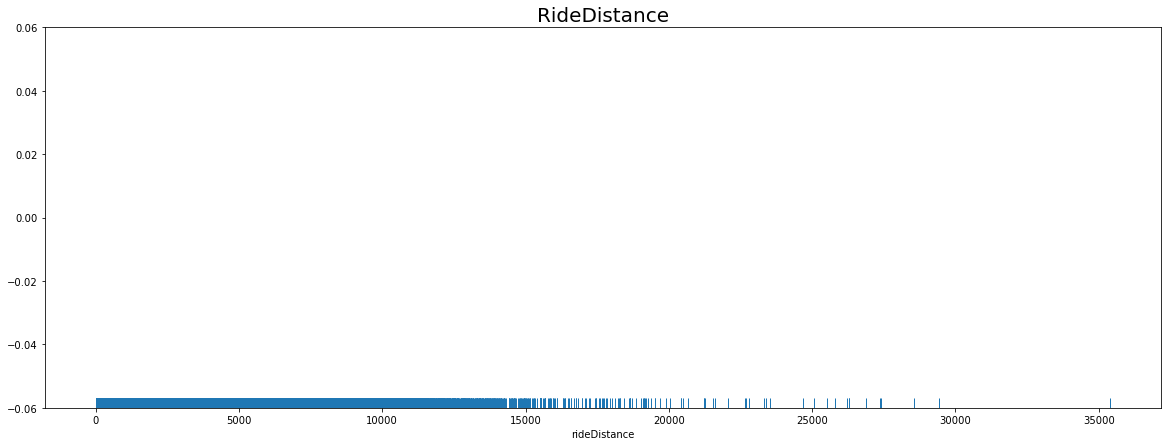

In [11]:
fig = plt.figure(figsize=(20,7))
plt.title("RideDistance",fontsize=20)
sns.rugplot(data.rideDistance)
plt.show()

## rugplot is a graph that places a dash horizontally with each occurrence of an item in a dataset. By observing the rugplot we can say that the highest ddistance is above 35000 meters and lowest distance is 0

<AxesSubplot:title={'center':'Longestkil'}, xlabel='longestKill'>

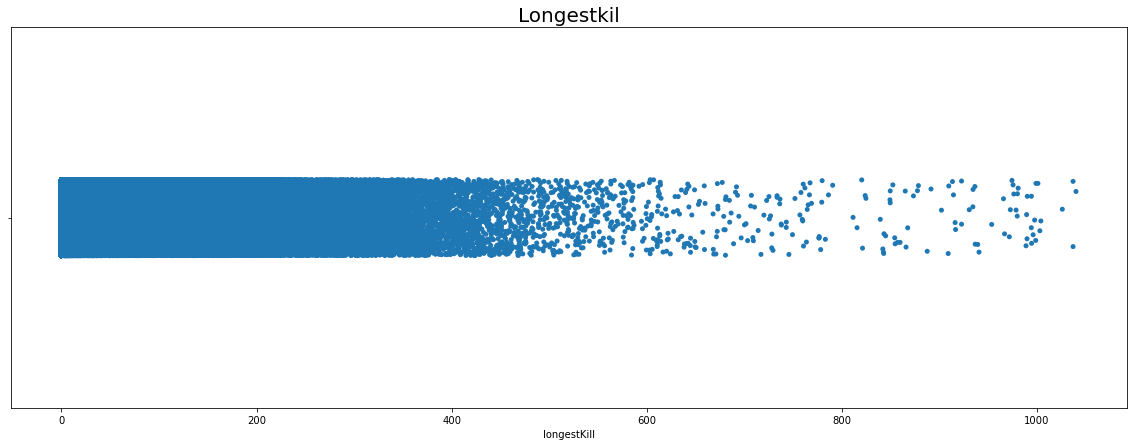

In [12]:
fig = plt.figure(figsize=(20,7))
plt.title("Longestkil",fontsize=20)
sns.stripplot(data.longestKill)

## by observing we can say that the longestkill is greater than 1000

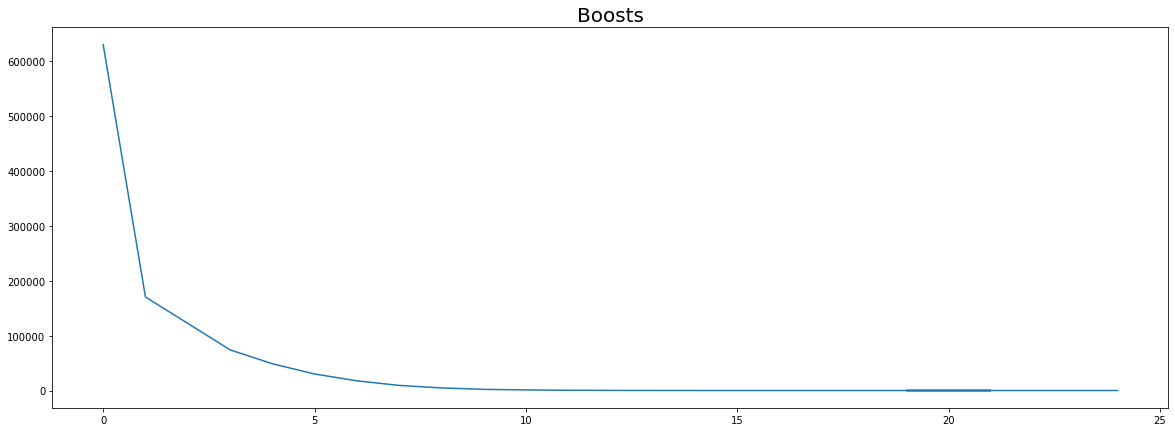

In [13]:
fig = plt.figure(figsize=(20,7))
plt.title("Boosts",fontsize=20)
data['boosts'].value_counts().plot.line()
plt.show()

## we can conclude that the players taken boosts are greater than 20 and less than 25 By observing the lineplot

<function matplotlib.pyplot.show(close=None, block=None)>

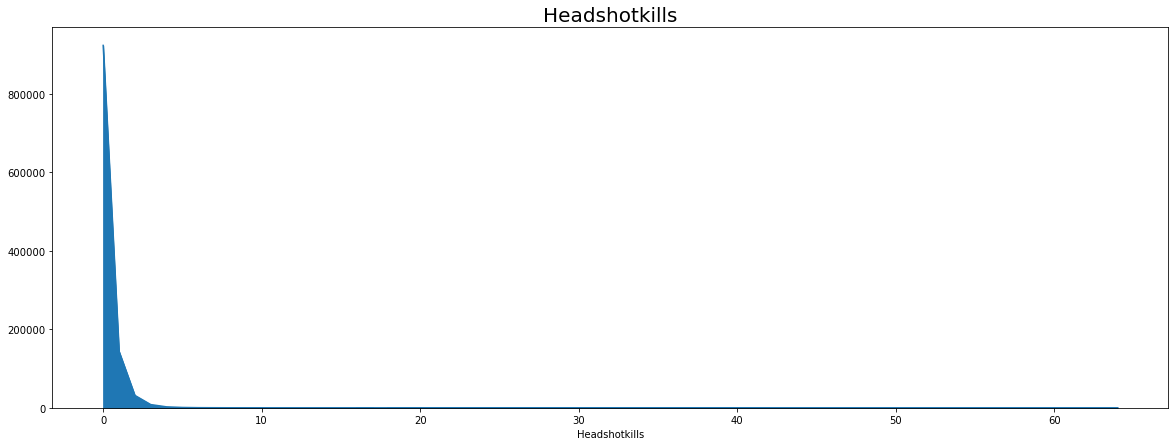

In [14]:
fig = plt.figure(figsize=(20,7))
plt.title("Headshotkills",fontsize=20)
plt.xlabel("Headshotkills",fontsize=10)
data['headshotKills'].value_counts().plot.area()
plt.show

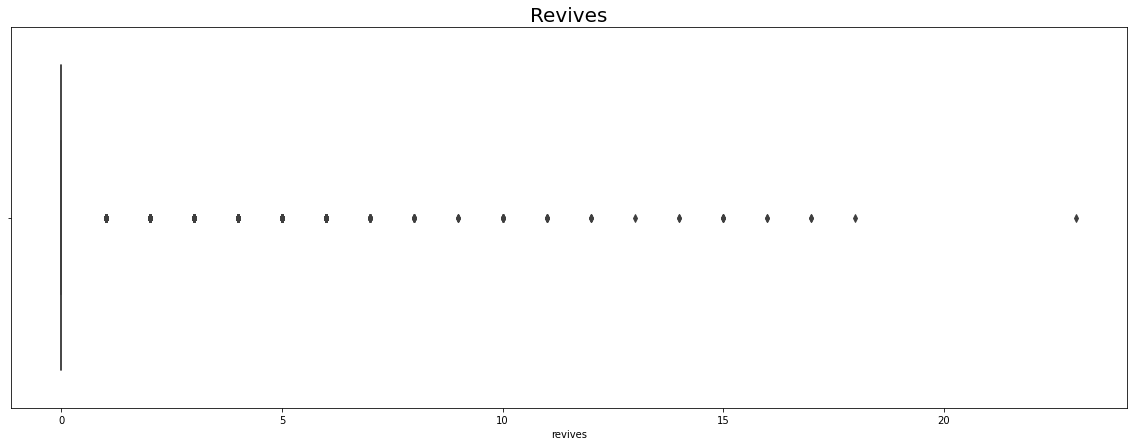

In [15]:
fig = plt.figure(figsize=(20,7))
plt.title("Revives",fontsize=20)
plt.xlabel("revives",fontsize=10)
sns.boxplot(data.revives)
plt.show()

## By observing the distplot the highest number of revives are  25

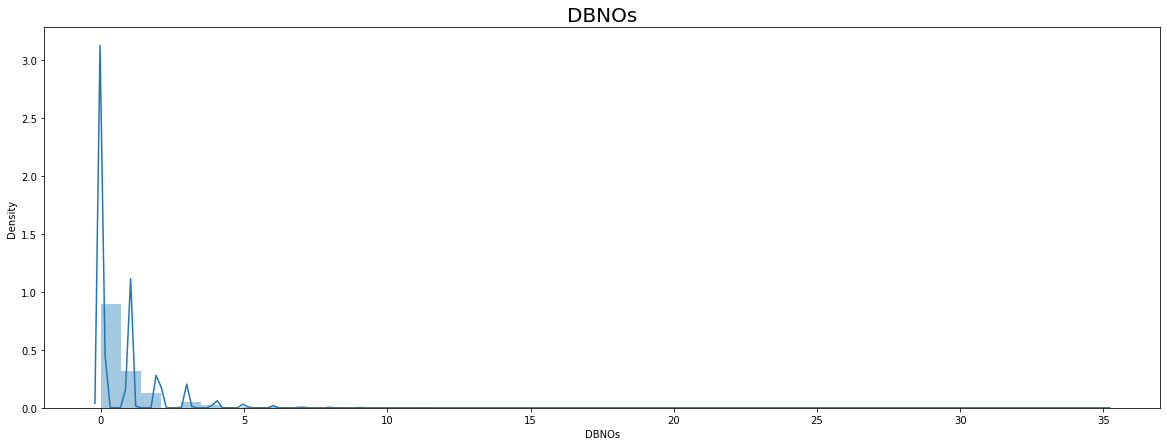

In [16]:
fig = plt.figure(figsize=(20,7))
plt.title("DBNOs",fontsize=20)
plt.xlabel("DBNOs",fontsize=10)
sns.distplot(data.DBNOs)
plt.show()

## by observing the kde plot the highest DBNOs are 35

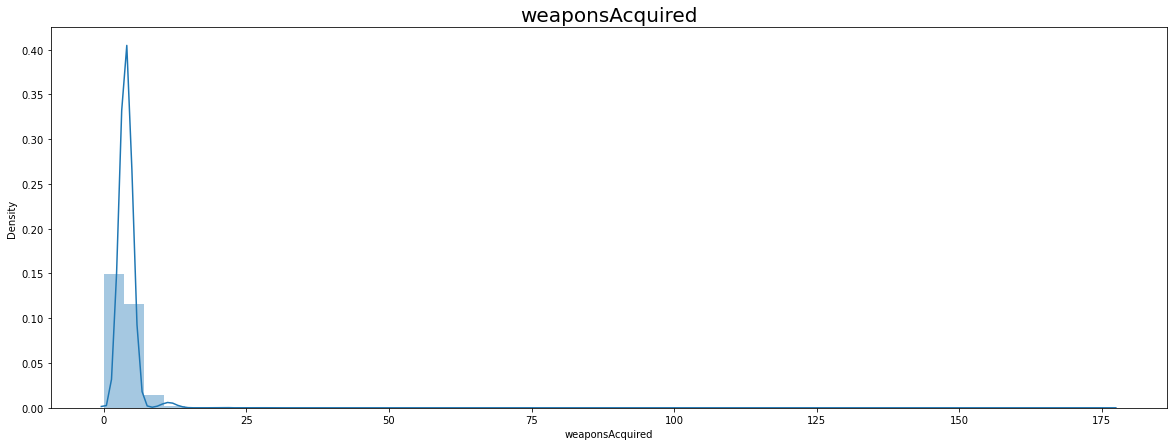

In [17]:
fig = plt.figure(figsize=(20,7))
plt.title("weaponsAcquired",fontsize=20)
plt.xlabel("weaponsAcquired",fontsize=10)
sns.distplot(data.weaponsAcquired) 
plt.show()

## we can conclude that the weapons acquired are 175 it is the highest

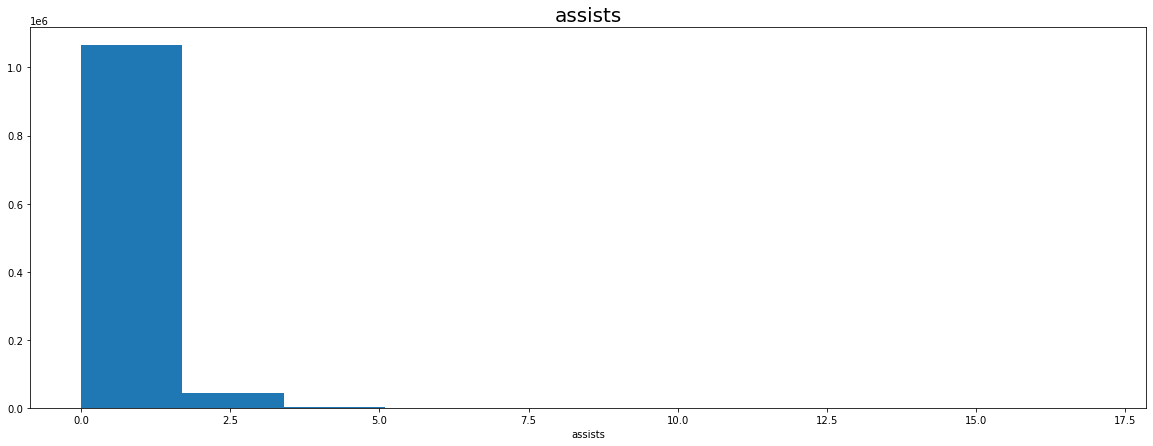

In [18]:
fig = plt.figure(figsize=(20,7))
plt.title("assists",fontsize=20)
plt.xlabel("assists",fontsize=10)
plt.hist(data.assists ) 
plt.show()

## we can conclude that the highest assest are 5

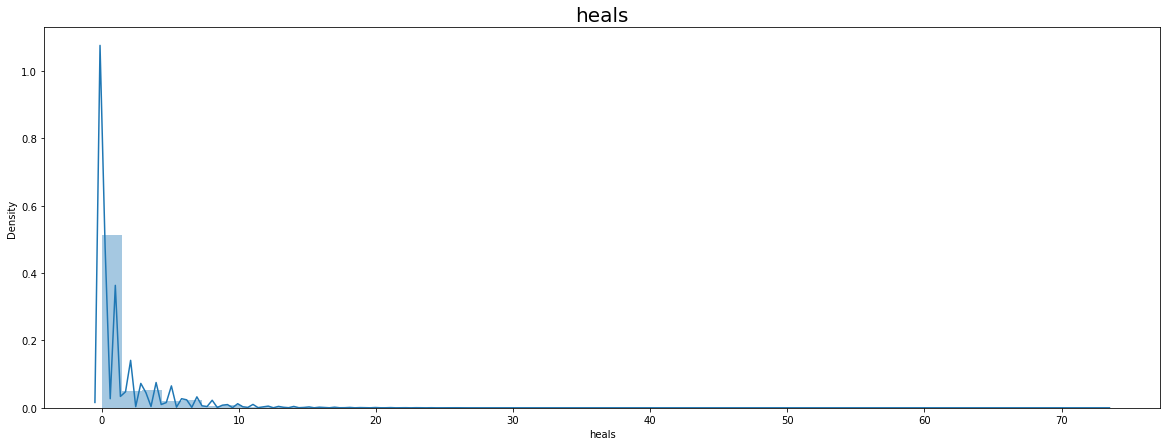

In [19]:
fig = plt.figure(figsize=(20,7))
plt.title("heals",fontsize=20)
plt.xlabel("heals",fontsize=10)
sns.distplot(data.heals)
plt.show()

## we can state that the heals are greater than 70+

# Bivariate Analysis

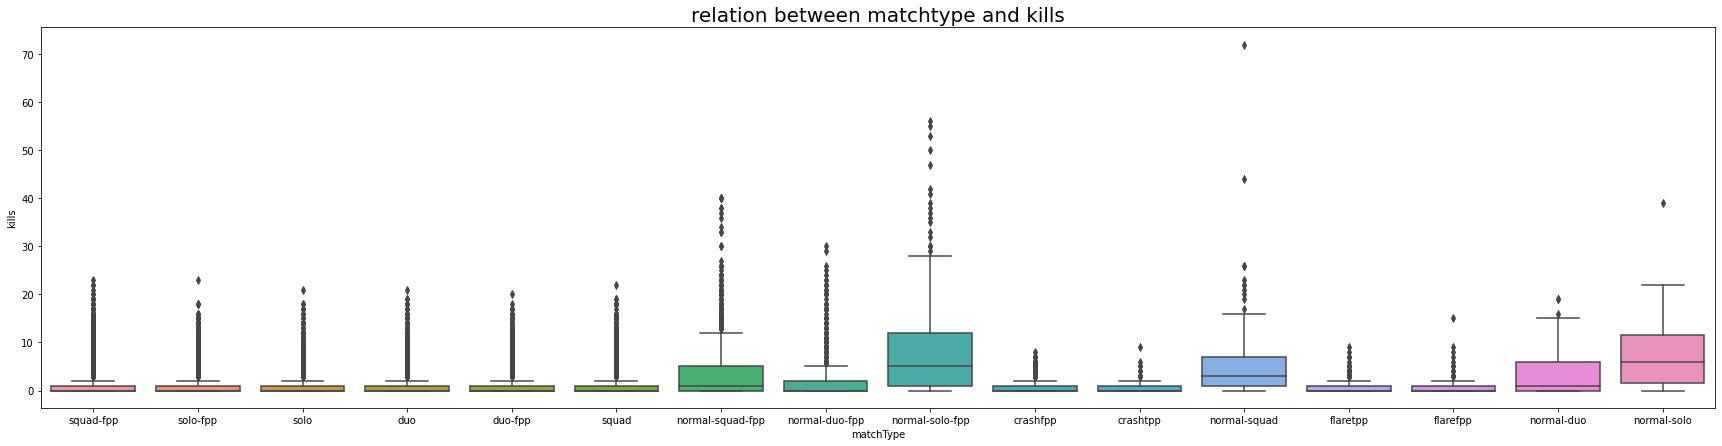

In [20]:
fig=plt.figure(figsize=(30,7))
plt.title("relation between matchtype and kills",fontsize=20)
plt.xlabel("matchType",fontsize=10)
plt.ylabel("kills",fontsize=10)
sns.boxplot(x=data['matchType'],y=data['kills'])
plt.show()

## by observing we can conclude that the average kills are highest in normal solo fpp and lies between 0 to 20 and highest kills are in normal squad

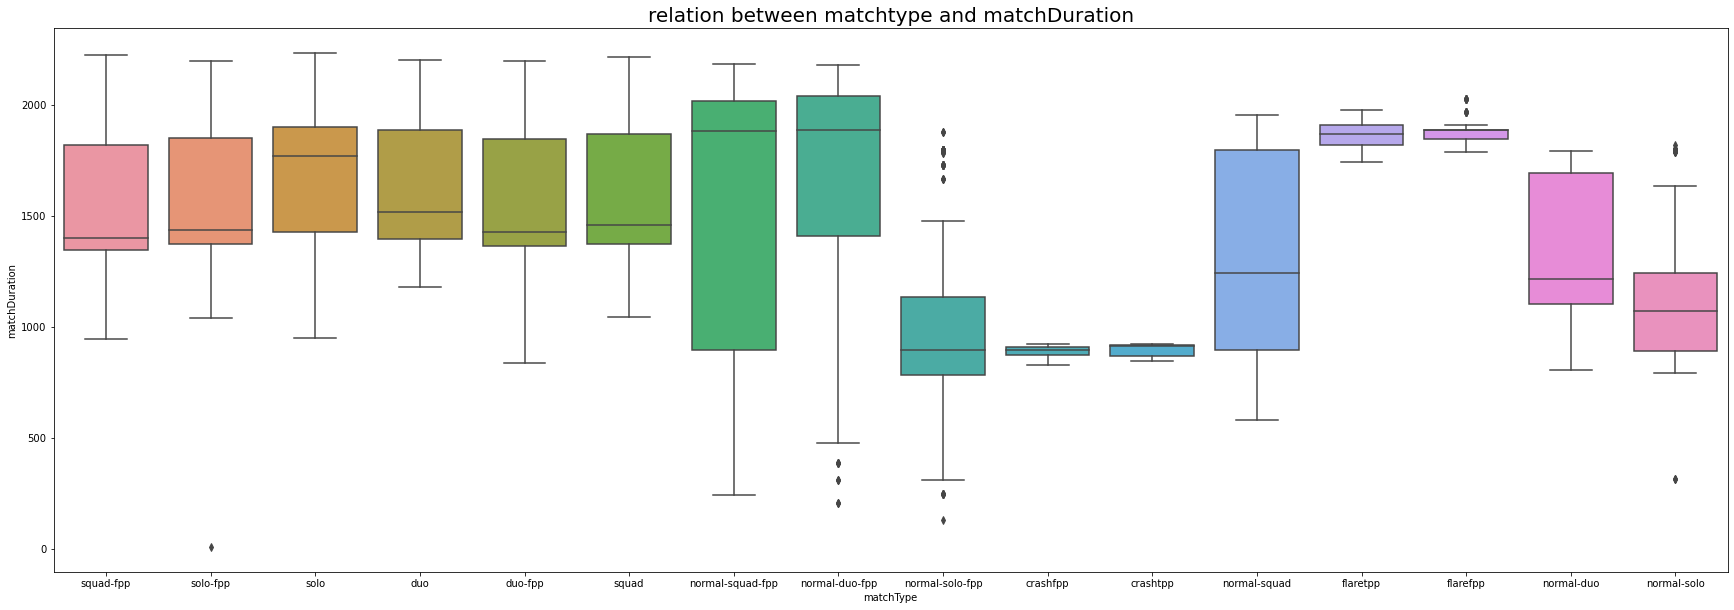

In [21]:
fig=plt.figure(figsize=(30,10))
plt.title("relation between matchtype and matchDuration",fontsize=20)
plt.xlabel("matchType",fontsize=10)
plt.ylabel("matchDuration",fontsize=10)
sns.boxplot(x=data['matchType'],y=data['matchDuration'])
plt.show()

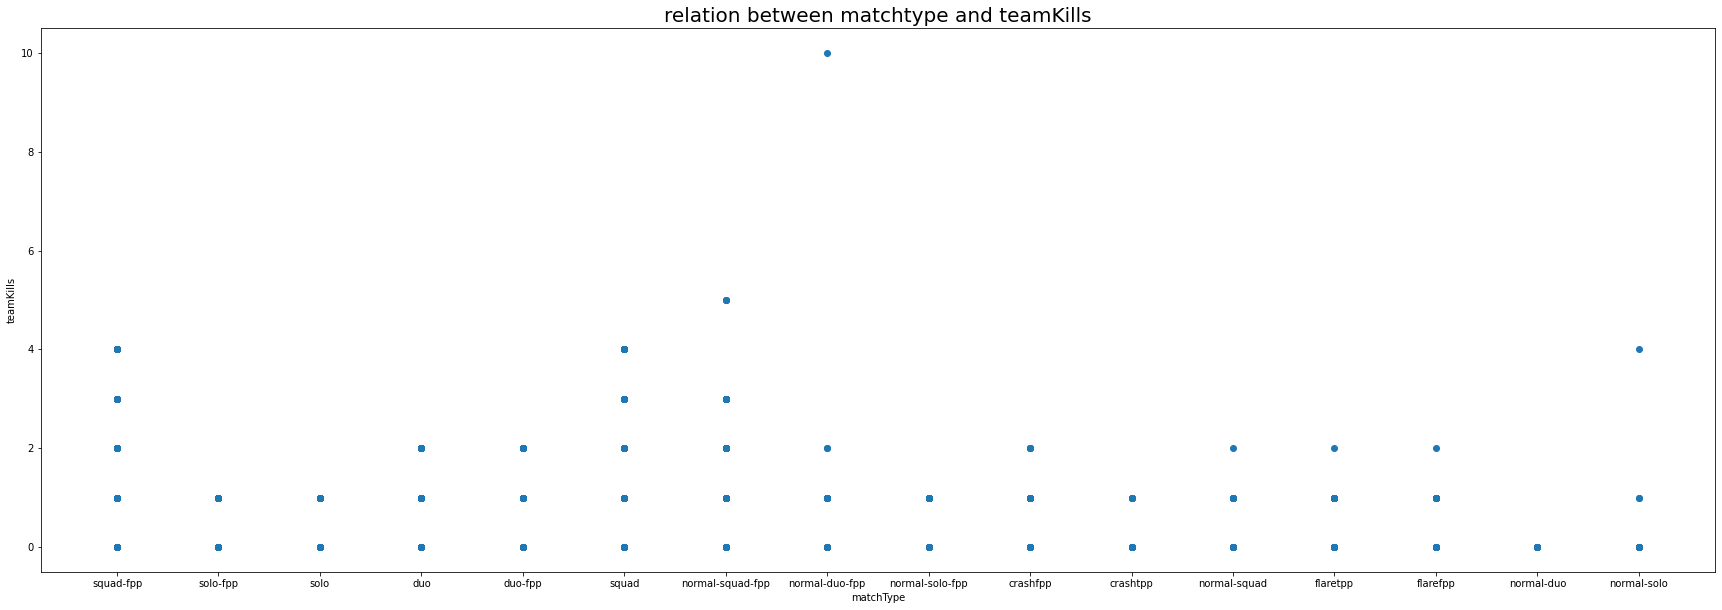

In [22]:
fig=plt.figure(figsize=(30,10))
plt.title("relation between matchtype and teamKills",fontsize=20)
plt.xlabel("matchType",fontsize=10)
plt.ylabel("teamKills",fontsize=10)
plt.scatter(x=data['matchType'],y=data['teamKills'])
plt.show()

## by observing we can conclude that the normal duo fpp is having the highest teamkills

In [23]:
from matplotlib.pyplot import figure

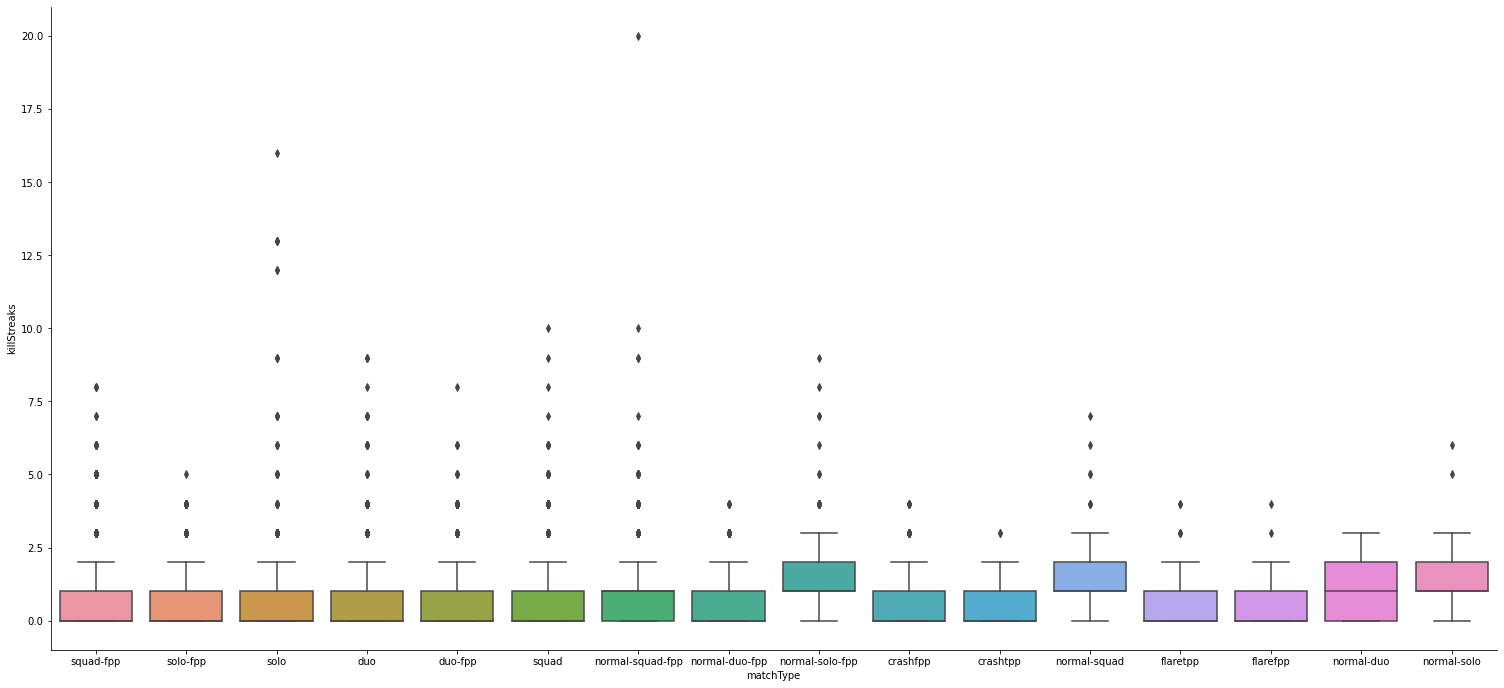

In [24]:
g=sns.catplot(x='matchType',y='killStreaks',kind='box',data=data)
g.fig.set_figwidth(25)
g.fig.set_figheight(10)

## by observing we can conclude that the normal squad fpp is having the highest killstreaks

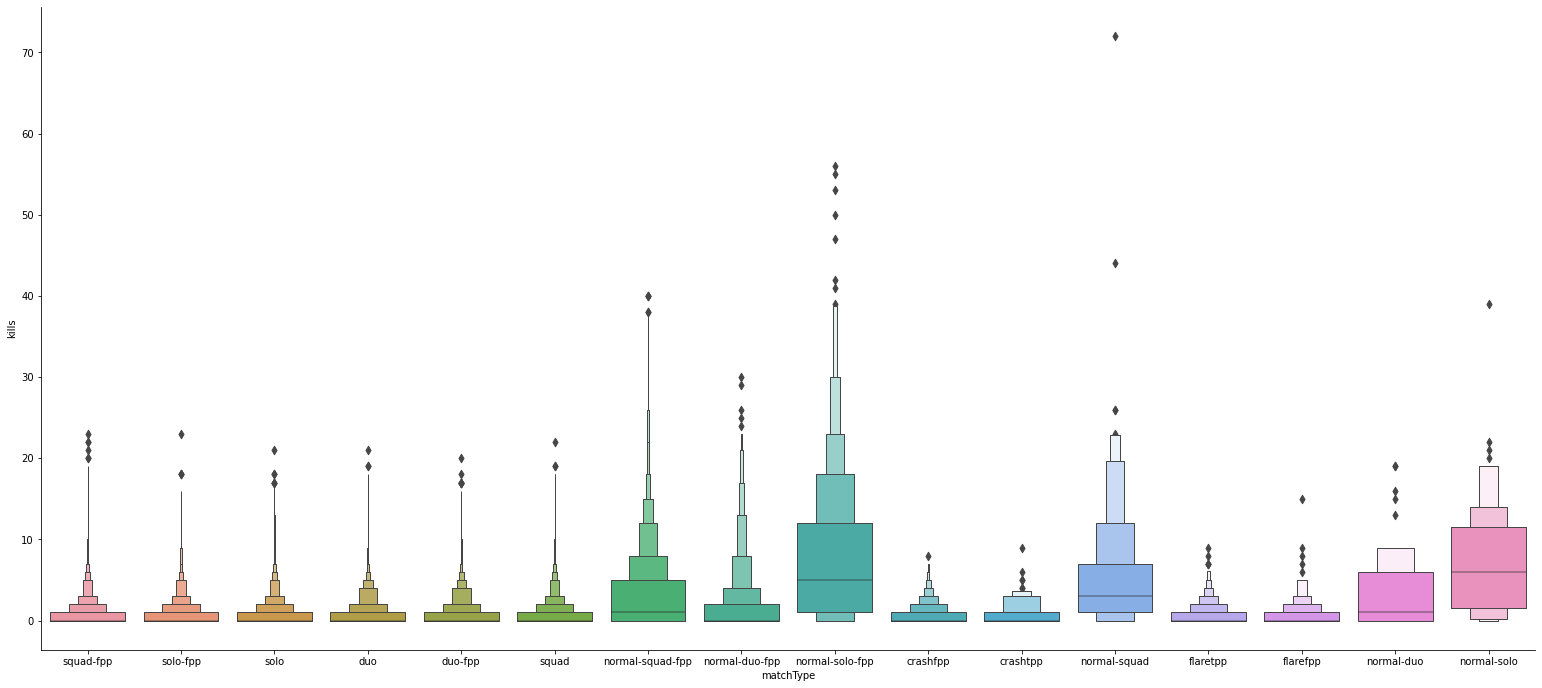

In [25]:
g = sns.catplot(data=data, x='matchType', y='kills',kind='boxen')
g.fig.set_figwidth(25)
g.fig.set_figheight(10)

## by observing we can conclude that the normal squad  is having the highest kills

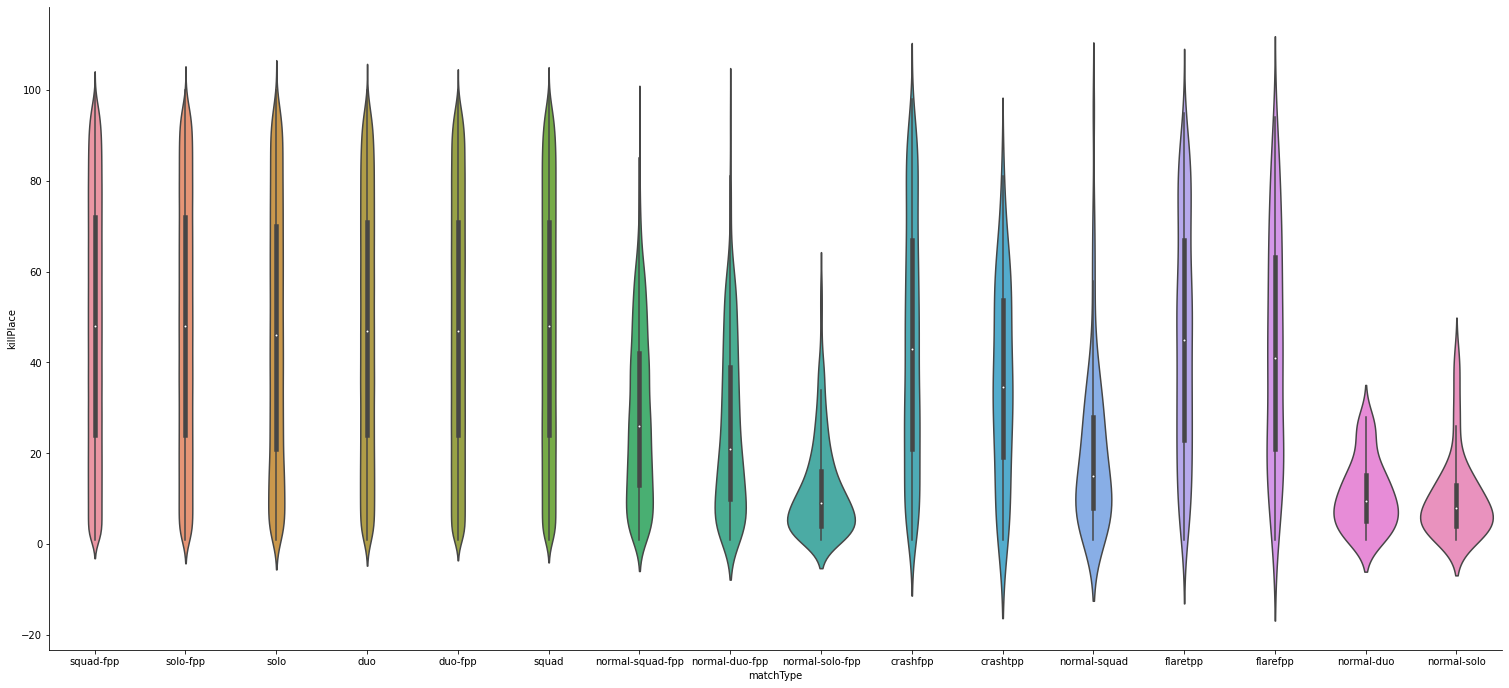

In [26]:
g = sns.catplot(data=data, x='matchType', y='killPlace',kind='violin')
g.fig.set_figwidth(25)
g.fig.set_figheight(10)

<AxesSubplot:xlabel='matchType'>

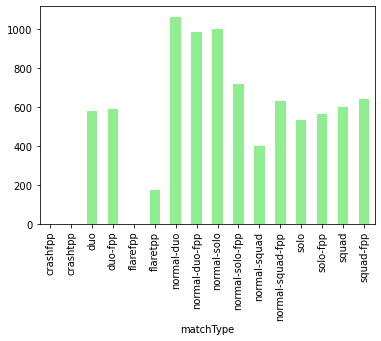

In [27]:
data.groupby("matchType")["winPoints"].mean().plot.bar(color = "lightgreen")

## by observing we can conclude that the normal duo is having the highest winpoints of 1000 

<AxesSubplot:>

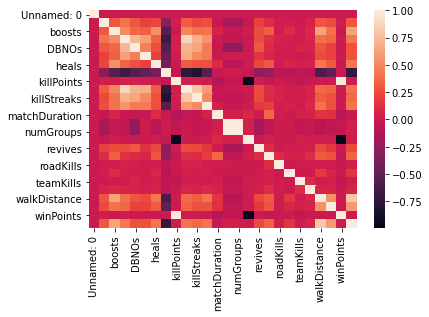

In [28]:
sns.heatmap(data.corr())

###  Unknown Variance of Population
A school has pubg players and having different squads they claim that the average team kills per a team is 2 and another group of people claim and they doesnot believe that the average kills is not equal to 2. How do you prove your claim?

step 1:

Alternate Hypothesis (Bold Claim):
$$ H_1 \ : \ \mu \neq2 $$
Null Hypothesis ( Status Quo ) :
$$ H_0 \ : \ \mu =2 $$

step 2:
* Collect a sample of size n = 15

$$ [2,3,4,2,1,0,1,0,3,1] $$
* Compute sample mean$$ \bar{x} \ = \ 1.7 , \ \sigma = not given $$

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: ? tailed t-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

## step 1 :sample mean

In [29]:
l=[2,3,4,2,1,0,1,0,3,1]
sample_mean=sum(l)/len(l)
print(sample_mean)

1.7


## step 2 : sample standard deviation

In [30]:
sample_std=np.std(l)
print(sample_std)

1.268857754044952


## step 3 : calculation of t score

In [31]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 1.7
pop_mean = 2
sample_std = 1.26

In [32]:
# T_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

In [33]:
# Calculating the t-score

tscore = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(tscore)

-0.7529232524210429


## step 4 : calculation of z critical value

In [34]:
# Two Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha/2,df=9) # Two tailed Z score for 95% Confidence Level

print(t_critical)

2.2621571627409915


##  step 5 : plotting the graph

Text(1.7, 0.0007, 'x_bar')

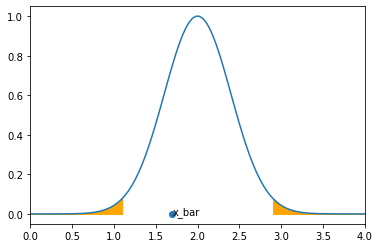

In [35]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 0
x_max = 4



# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

## step 6 :calculation using the t test

In [36]:
# Conclusion using t test

if(np.abs(tscore) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


## step 7 : calculation using the p test

In [37]:
# Conclusion using p test

p_value = 2 * (1.0 - t.cdf(np.abs(tscore),df=14))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.4639695253919376
Fail to reject Null Hypothesis


## conclusion : The average team kills is not eqaul to 2 and fail to reject the null hypothesis
